Chapter 14

# 求和符号
Book_3《数学要素》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码的目的是生成一个随机矩阵 $a_{i,j}$，然后分别绘制该矩阵的值、矩阵按行求和以及按列求和的热力图。具体来说，代码分为以下几个步骤：

1. **定义热力图绘制函数**：函数`heatmap_sum`使用`seaborn`库中的`heatmap`函数绘制热力图。该函数接受数据矩阵 `data`，行、列索引数组 `i_array` 和 `j_array` 以及图表标题 `title` 作为参数。`heatmap`函数会将矩阵的每个元素以颜色块的形式展示在图中，不同颜色表示不同数值范围。

2. **生成随机矩阵**：首先通过设置随机种子（`np.random.seed(0)`）保证每次运行得到的随机矩阵一致。定义矩阵大小为 $8 \times 12$，即行数 $n = 8$ 和列数 $m = 12$，矩阵元素符合正态分布，均值为 0，标准差为 1。生成的矩阵表示为 $a_{i,j}$，其中 $i$ 和 $j$ 分别表示行和列索引。

3. **绘制矩阵 $a_{i,j}$ 的热力图**：通过调用`heatmap_sum`，将矩阵 $a_{i,j}$ 的值可视化，显示其元素值的分布。图中，横轴和纵轴分别表示列索引 $j$ 和行索引 $i$。

4. **按行求和**：代码通过矩阵乘法实现对矩阵 $a_{i,j}$ 的行求和。为了实现这一点，构造一个 $8 \times 1$ 的全1列向量 `all_1`，将其转置后与矩阵 $a_{i,j}$ 相乘，即 $all\_1^T \cdot a_{i,j}$。这一操作将每一列的所有行相加，得到一个 $1 \times 12$ 的向量，其第$j$项表示：

   $$
   \sum_{i=1}^{n} a_{i,j}
   $$

   生成的结果是一维向量，表示每一列的总和。

5. **按列求和**：同样地，创建一个 $12 \times 1$ 的全1列向量，通过矩阵乘法 $a_{i,j} \cdot all\_1$ 对每一行的所有列相加，得到一个 $8 \times 1$ 的向量。其第$i$项表示：

   $$
   \sum_{j=1}^{m} a_{i,j}
   $$

   此结果展示了矩阵每一行的总和。

6. **可视化部分求和结果**：代码依次调用`heatmap_sum`函数，将按行求和和按列求和的结果分别可视化为热力图。这样便于观察矩阵在行或列方向上的累积变化。

通过热力图的展示方式，用户可以直观地看到原始矩阵元素的分布以及在行、列方向上的累积求和结果。

## 导入包

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## 定义绘制热力图的函数

In [2]:
def heatmap_sum(data, i_array, j_array, title):
    # 创建绘图窗口和坐标轴
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # 使用seaborn绘制热力图，颜色映射为'RdYlBu_r'
    ax = sns.heatmap(data, cmap='RdYlBu_r',
                     cbar_kws={"orientation": "horizontal"},
                     yticklabels=i_array, xticklabels=j_array,
                     ax=ax)
    ax.set_xlabel('Index, $j$')  # 设置x轴标签
    ax.set_ylabel('Index, $i$')  # 设置y轴标签
    
    ax.set_aspect("equal")  # 保持坐标轴比例一致
    plt.title(title)  # 设置图表标题
    plt.yticks(rotation=0)  # y轴刻度不旋转

## 数据初始化

In [3]:
np.random.seed(0)  # 设置随机种子，确保结果可重复

m = 12  # 列数（对应j的取值范围1到m）
n = 8   # 行数（对应i的取值范围1到n）

j_array = np.arange(1, m + 1)  # 列索引
i_array = np.arange(1, n + 1)  # 行索引

jj, ii = np.meshgrid(j_array, i_array)  # 创建网格坐标

a_ij = np.random.normal(loc=0.0, scale=1.0, size=(n, m))  # 生成随机数矩阵，表示$a_{i,j}$

## 绘制矩阵 $a_{i,j}$ 的热力图

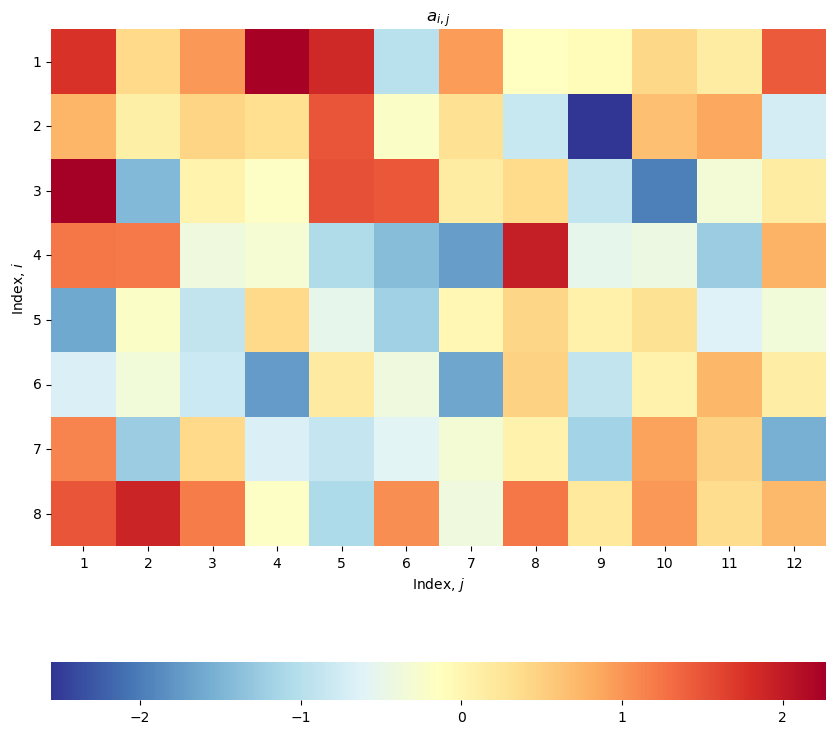

In [4]:
title = '$a_{i,j}$'  # 图表标题
heatmap_sum(a_ij, i_array, j_array, title)  # 调用热力图绘制函数

## 对矩阵 $a_{i,j}$ 按行进行部分求和

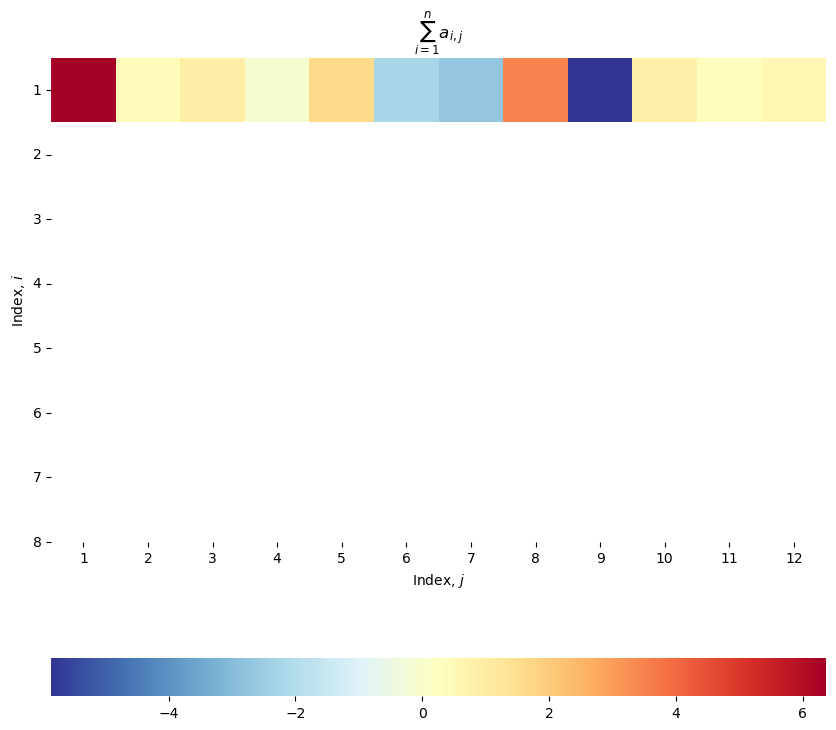

In [5]:
all_1 = np.ones((8, 1))  # 创建一个全1列向量，大小为8行1列
sum_over_i = all_1.T @ a_ij  # 对行方向求和，结果为一行

title = r'$\sum_{i=1}^{n} a_{i,j}$'  # 设置图表标题，表示对i求和
heatmap_sum(sum_over_i, i_array, j_array, title)  # 绘制部分求和结果的热力图

## 对矩阵 $a_{i,j}$ 按列进行部分求和

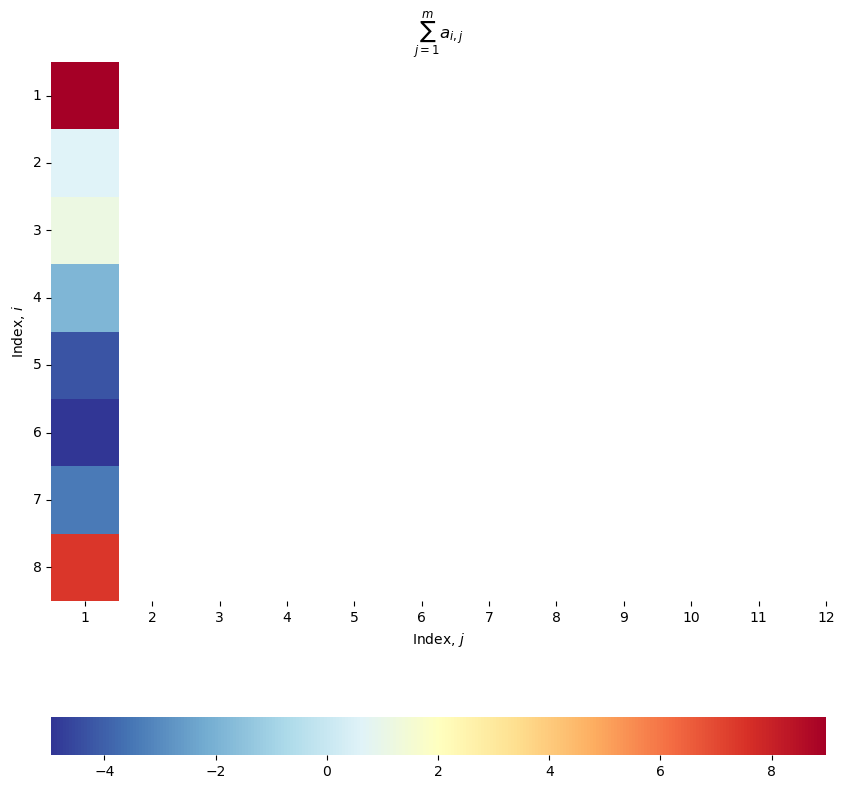

In [6]:
all_1 = np.ones((12, 1))  # 创建一个全1列向量，大小为12行1列
sum_over_j = a_ij @ all_1  # 对列方向求和，结果为一列

title = r'$\sum_{j=1}^{m} a_{i,j}$'  # 设置图表标题，表示对j求和
heatmap_sum(sum_over_j, i_array, j_array, title)  # 绘制部分求和结果的热力图